<a href="https://colab.research.google.com/github/muditbit/img_classifier_SVM_or_XGBoost/blob/master/MinorProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import os 
from skimage.io import imread
from skimage.transform import resize

In [2]:
!pip install bing-image-downloader



In [3]:
!mkdir images

In [4]:
from bing_image_downloader import downloader
downloader.download("Dog",limit=30,output_dir = 'images',
                    adult_filter_off=True)



[!!]Indexing page: 1

[%] Indexed 10 Images on Page 1.


[%] Downloading Image #1 from http://www.viralnovelty.net/wp-content/uploads/2014/10/animal-family-portraits-14__880.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://www.top13.net/wp-content/uploads/2015/11/dog-pictures-taken-at-the-right-time-4.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://hative.com/wp-content/uploads/2014/10/cool-pet-costumes/8-cool-pet-costumes.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://www.animals-zone.com/wp-content/uploads/2014/04/laughing-dog.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://wanna-joke.com/wp-content/uploads/2014/12/funny-dog-standing-kitchen-woman-window.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://www.germanshepherds.com/forum/attachments/general-puppy-stuff/456690d1509727452-car-ride-chillin-4fb4a772-8efd-4909-a754-44962ea174f3_1509727451754.jpg
[%] File Downloaded !

[%] Downloading Image #7 

In [5]:
downloader.download("Cat",limit=30,output_dir = 'images',
                    adult_filter_off=True)



[!!]Indexing page: 1

[%] Indexed 10 Images on Page 1.


[%] Downloading Image #1 from http://www.top13.net/wp-content/uploads/2015/12/huge-maine-coon-cats-11.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://cdn.designrulz.com/wp-content/uploads/2012/02/Cat_Furniture_Kattenmeubels_Kattenmeubelen_UrbanCatDesign_Gallery_1_F43.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://www.demilked.com/magazine/wp-content/uploads/2014/02/cat-home-playground-trillium-enterprises-5.jpg
[%] File Downloaded !

[%] Downloading Image #4 from http://bengals-of-noa-island.com/index.php?rex_img_type=galerie_thumb&amp;rex_img_file=p1100291.jpg
[Error]Invalid image, not saving http://bengals-of-noa-island.com/index.php?rex_img_type=galerie_thumb&amp;rex_img_file=p1100291.jpg

[!] Issue getting: http://bengals-of-noa-island.com/index.php?rex_img_type=galerie_thumb&amp;rex_img_file=p1100291.jpg
[!] Error:: No active exception to reraise
[%] Downloading Image #4 from https://www.

In [7]:
target =[]
flat_data =[]
images =[]

datadir = '/content/images'
CATEGORIES = ['Cat','Dog']

for category in CATEGORIES:
  #print(category)
  class_num = CATEGORIES.index(category)
  #print(class_num)\
  path = os.path.join(datadir,category)
  #print(path)
  for img in os.listdir(path):
    img_ar = imread(os.path.join(path,img))
    #print(img_ar.shape)
    #plt.imshow(img_ar)
    img_resized = resize(img_ar,(150,150,3))
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)


flat_data = np.array(flat_data)
images = np.array(images)
target = np.array(target)

In [8]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [9]:
unique,count = np.unique(target,return_counts=True)

In [10]:
count , unique

(array([30, 30]), array([0, 1]))

<BarContainer object of 2 artists>

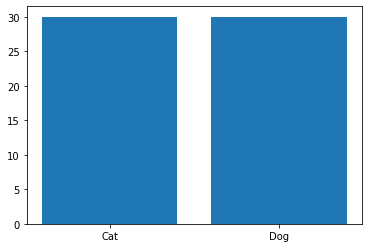

In [11]:
plt.bar(CATEGORIES,count)

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(flat_data,target,test_size =0.4, random_state = 123)

In [13]:
y_test

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1])

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

param_grid = [
              {'C':[1,10,100,1000],'kernel':['rbf']},
              {'C':[1,10,100,1000],'kernel':['rbf'],'gamma':[0.1,0.01,0.001,0.0001,0.00001]},

]
svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid)

In [15]:
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000],
                          'gamma': [0.1, 0.01, 0.001, 0.0001, 1e-05],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [16]:
y_pred  =clf.predict(x_test)
y_pred

array([0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0])

In [17]:
y_test

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1])

In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix
s = (accuracy_score(y_pred,y_test))
print(s)
confusion_matrix(y_pred,y_test)

0.6666666666666666


array([[8, 3],
       [5, 8]])

In [19]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(x_train,y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [21]:
y_predict = model.predict(x_test)
y_predict

array([0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0])

In [22]:
y_test

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1])

In [23]:
x = accuracy_score(y_predict,y_test)
x

0.5833333333333334

In [24]:
confusion_matrix(y_predict,y_test)


array([[10,  7],
       [ 3,  4]])

In [25]:
import pickle
if x>s:
  pickle.dump(model,open('img_model.p','wb'))
else:
  pickle.dump(clf,open('img_model.p','wb'))

In [26]:
model1 =pickle.load(open('img_model.p','rb'))

Enter URLhttps://i.pinimg.com/originals/1c/2f/52/1c2f52962906d49ee2c3359a23de64e1.jpg
(600, 800, 3)
Predicted output : Cat


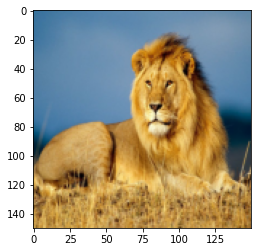

In [27]:
#testing the brand new Image
flat_data = []
url = input("Enter URL")
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data  =np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model1.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f'Predicted output : {y_out}')